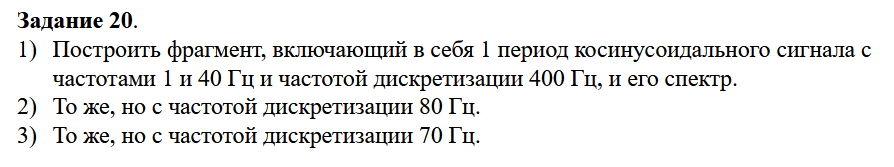

Частота Найквиста: fs/2 - определяет максимальную частоту, которая может быть корректно представлена в дискретном сигнале

Если в сигнале есть частоты, превышающие её, то при дискретизации спектр будет искажен

При уменьшении частоты дискретизации уменьшается и амплитуда пиков в спектре. Это связано с тем, что при меньшем количестве отсчетов захватывается меньше энергии сигнала

Минимальная необходимая частота дискретизации 2 * max(1, 40) = 80<br>
400 > 80 => сигнал будет восстановлен без искажений, спектр будет точно представлять все компоненты сигнала<br>
80 = 80 => сигнал будет восстановлен без искажений, спектр будет точно представлять все компоненты сигнала<br>
70 < 80 => сигнал будет искажен, спектр будет искажен

In [3]:
import numpy as np
import matplotlib.pyplot as plt

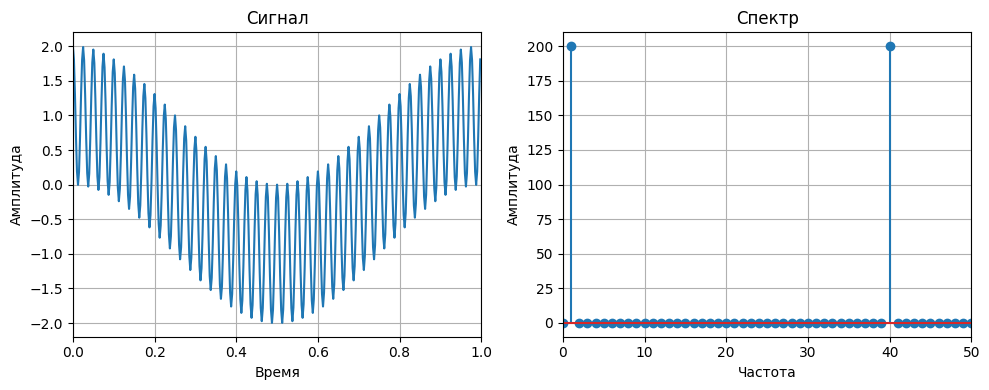

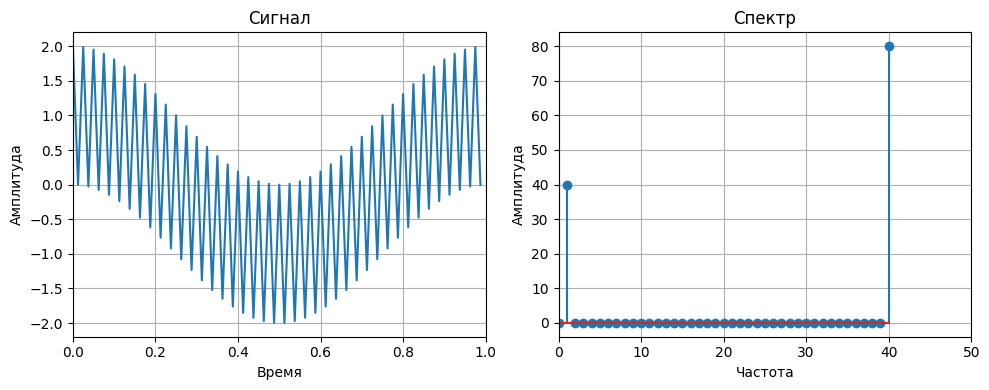

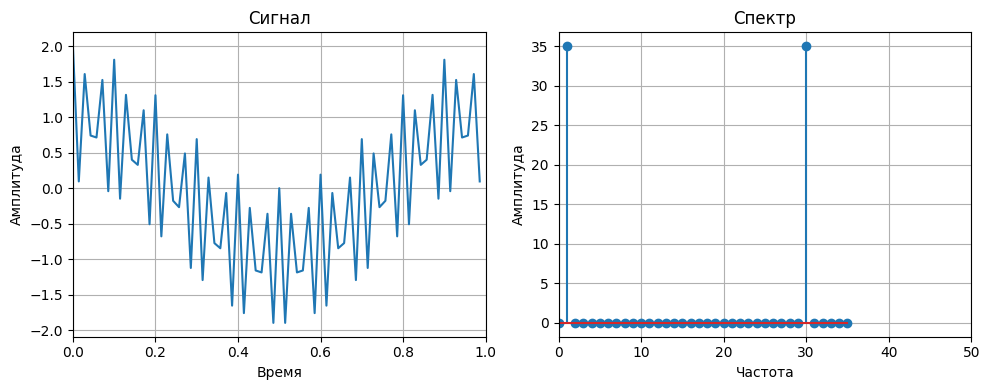

In [4]:
def spectrum(fs):
    t = np.linspace(0, 1, fs, endpoint=False)
    signal = np.cos(2 * np.pi * t) + np.cos(2 * np.pi * 40 * t)

    N = len(signal)
    yf = np.fft.rfft(signal)
    xf = np.fft.rfftfreq(N, 1/fs)

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    axs[0].plot(t, signal)
    axs[0].set_title('Сигнал')
    axs[0].set_xlabel('Время')
    axs[0].set_ylabel('Амплитуда')
    axs[0].grid()
    axs[0].set_xlim(0, 1)

    axs[1].stem(xf, np.abs(yf))
    axs[1].set_title('Спектр')
    axs[1].set_xlabel('Частота')
    axs[1].set_ylabel('Амплитуда')
    axs[1].grid()
    axs[1].set_xlim(0, 50)

    plt.tight_layout()
    plt.show()

for fs in [400, 80, 70]:
    spectrum(fs)